# Pymaceuticals Inc.
---

### Analysis

- Strong correlation between weight and tumor volume for capomulin treated mice. Heavier mice = larger tumors
- Most mice were treated using capomulin and reamicane
- Most L509 had a strong response to capomulin, and experienced decreased tumor volumes
- Capomulin and Ramicane had the best effects on mice, making the respective mice tumors smaller
 

In [1]:
# Dependencies and Setup

import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how = "left", on=["Mouse ID"])
# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()

# Print the number of mice
print("Number of mice:", num_mice)

Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_number_duplicates = combined_data.duplicated(subset = ["Mouse ID","Timepoint"])
duplicate_ID = combined_data.loc[mice_number_duplicates, "Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_data.loc[combined_data["Mouse ID"] == duplicate_ID[0]]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop(duplicates.index)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_data["Mouse ID"].unique())
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_summary = clean_data.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
sumary_mean = mouse_summary["Tumor Volume (mm3)"].mean()
sumary_median = mouse_summary["Tumor Volume (mm3)"].median()
sumary_variance = mouse_summary["Tumor Volume (mm3)"].var()
sumary_std = mouse_summary["Tumor Volume (mm3)"].std()
sumary_sem = mouse_summary["Tumor Volume (mm3)"].sem()

summary_all = pd.DataFrame({
    "Mean Tumor Volume": sumary_mean,
    "Median Tumor Volume": sumary_median,
    "Tumor Volume Variance": sumary_variance,
    "Tumor Volume Std. Dev.": sumary_std,
    "Tumor Volume Std. Err.": sumary_sem})
# Assemble the resulting series into a single summary DataFrame.
summary_all


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary = combined_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
# Using the aggregation method, produce the same summary statistics in a single line.
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

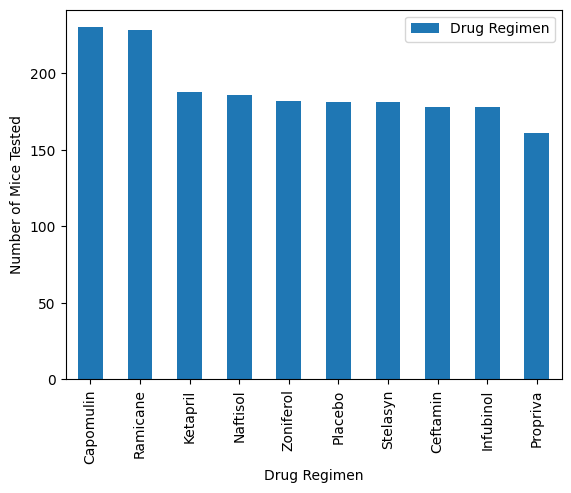

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = combined_data.groupby("Drug Regimen")
drug_regimen_count = pd.DataFrame(drug_regimen["Drug Regimen"].count().sort_values(ascending=False))
drug_regimen_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


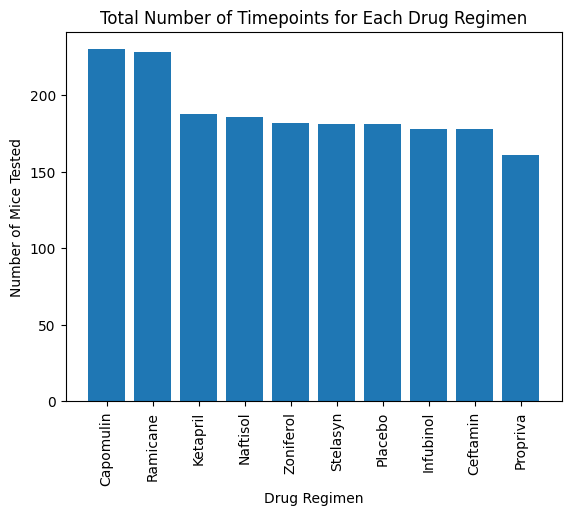

In [10]:
# Perform a count of timepoints for each drug regimen
drug_counts = combined_data['Drug Regimen'].value_counts()

# Generate a bar plot
plt.bar(drug_counts.index, drug_counts.values)

# Set the plot labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Number of Timepoints for Each Drug Regimen")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

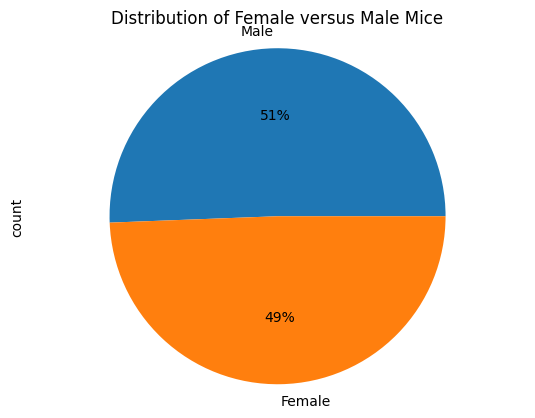

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the occurrences of each gender
gender_counts = combined_data['Sex'].value_counts()

# Generate a pie plot
gender_counts.plot(kind='pie', autopct='%1.0f%%', startangle=0)

# Set the aspect ratio to make the pie circular
plt.axis('equal')

# Set the plot title
plt.title('Distribution of Female versus Male Mice')

# Display the plot
plt.show()

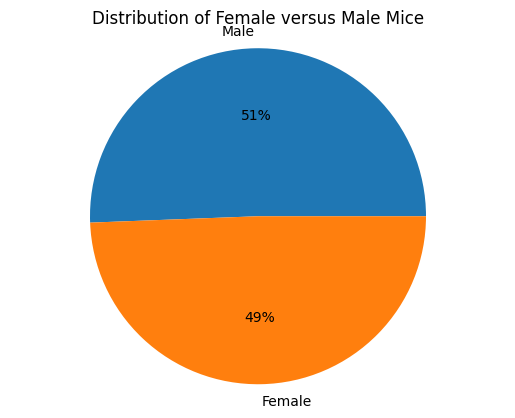

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the occurrences of each gender
gender_counts = combined_data['Sex'].value_counts()

# Create a list of labels for the pie chart
labels = gender_counts.index

# Create a list of values for the pie chart
sizes = gender_counts.values

# Create the pie plot
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=0)

# Set the aspect ratio to make the pie circular
plt.axis('equal')

# Set the plot title
plt.title('Distribution of Female versus Male Mice')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = combined_data[combined_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, combined_data, on=['Mouse ID', 'Timepoint'])


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset tumor volume data to the list
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the upper and lower bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Check for potential outliers
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print the results
    print(f"{treatment} Potential Outliers {outliers}")

Capomulin Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


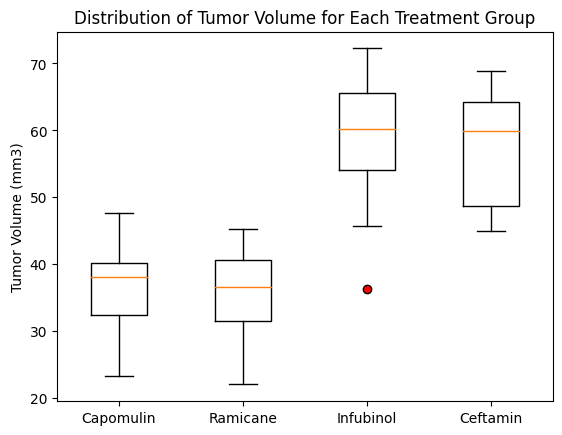

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volume data for each treatment group
tumor_volume_data = [final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
                     for treatment in treatments]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the box plots with red dots
ax.boxplot(tumor_volume_data, flierprops={'marker': 'o', 'markerfacecolor': 'red'})

# Set the x-axis tick labels
ax.set_xticklabels(treatments)

# Set the y-axis label
ax.set_ylabel('Tumor Volume (mm3)')

# Set the title
ax.set_title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

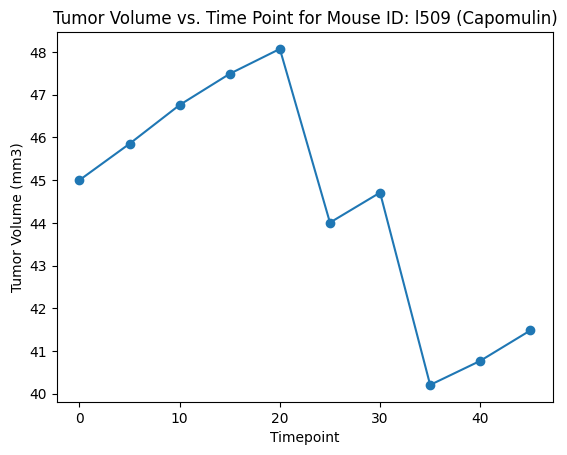

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Select the data for a mouse treated with Capomulin
mouse_id = "l509"
capomulin_data = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Mouse ID"] == mouse_id), ["Timepoint", "Tumor Volume (mm3)"]]

# Create a line plot of tumor volume vs. time point
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker="o")

# Set the x-axis label
plt.xlabel("Timepoint")

# Set the y-axis label
plt.ylabel("Tumor Volume (mm3)")

# Set the title
plt.title(f"Tumor Volume vs. Time Point for Mouse ID: {mouse_id} (Capomulin)")

# Show the plot
plt.show()


In [17]:
capomulinDF = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [34]:
#group by the Mouse ID and take the means


## Correlation and Regression

In [26]:
corr = st.pearsonr(capomulinDF ['Weight (g)'], capomulinDF['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {corr:.2f}")

The correlation between mouse weight and the average tumor volume is 0.53


In [36]:
x_values = capomulinDF["Weight (g)"]
y_values = capomulinDF["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regressValues = x_values * slope + intercept
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

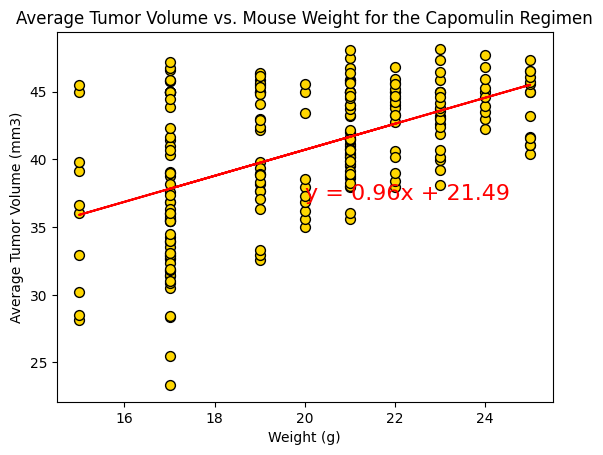

In [37]:
plt.scatter(x_values, y_values, facecolor = "gold", edgecolor="black", s=50)

plt.plot(x_values, regressValues, "r-")
plt.annotate(lineEQ, (20, 37), fontsize=16, color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()